iter   res
0 27263.47326647417
1 13497.723715794347
2 3542.185276715086
3 1479.2010707065199
4 689.5752465054768
5 254.9182678693055
6 165.49400459804505
7 122.03240495708297
8 90.30360377810653
9 77.01550893773435


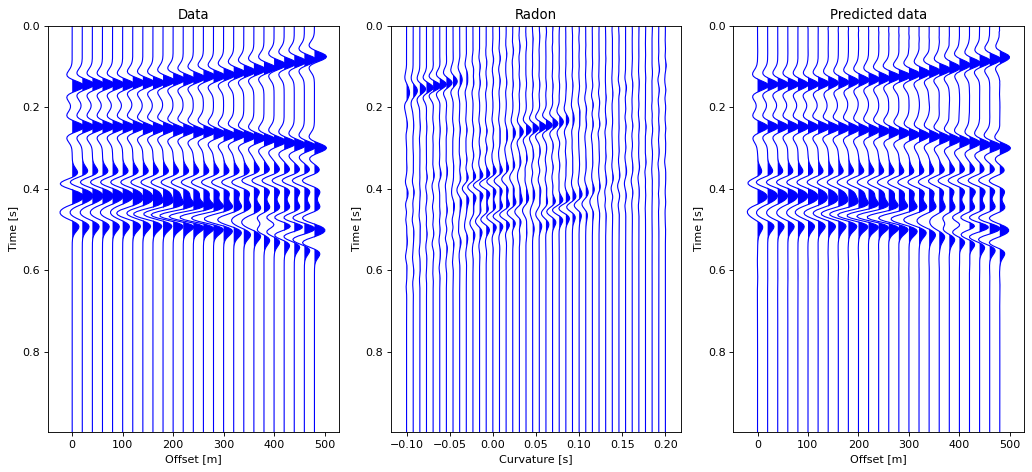

In [10]:

# Parabolic Radon Transform / Time domain code

import numpy as np
import radon_lib as rl
import seismic_lib as seismic
import matplotlib.pyplot as plt

Np = 40         # Curvatures
Nt = 250
Nh = 25
dt = 4./1000.
dh = 20. 

p = np.linspace(-0.1,.2,Np)
h = np.linspace(0,(Nh-1)*dh,Nh)

d = np.zeros((Nt,Nh))
m = np.zeros((Nt,Np))

m0 = np.zeros((Nt,Np))
f0 = 14

wavelet = seismic.ricker(dt,f0)

Nw = len(wavelet)
href=h[Nh-1]

m[40:40+Nw,20]=wavelet
m[90:90+Nw,24]=-wavelet
m[95:95+Nw,14]=-wavelet
m[15:15+Nw,4]=wavelet

m[75:75+Nw,12]=-wavelet

# Get the data using the forward operator

d = rl.radon_forward(m,Nt,dt,Nh,h,Np,p,href)    # Make data by forward Radon modelling d = L m

# Invert the Radon coefficients using LS

m = rl.radon_cg(d,m0,Nt,dt,Nh,h,Np,p,href,10)  # Compute m via inversion using Conjugate Gradients 

dp = rl.radon_forward(m,Nt,dt,Nh,h,Np,p,href)  # Predict data from inverted m

# -----------------------------------
# Rest of the stuff is for plotting
# -----------------------------------

xcur = 1.2
plt.figure(figsize=(13, 6), dpi=80)
           
plt.subplot(1,3,1)
seismic.wigb(d,dt,h,xcur,'b')
plt.title('Data')
plt.xlabel('Offset [m]')
plt.ylabel('Time [s]')

plt.subplot(1,3,2)
seismic.wigb(m,dt,p,xcur,'b')
plt.title('Radon')
plt.xlabel('Curvature [s]')
plt.ylabel('Time [s]')

plt.subplot(1,3,3)
seismic.wigb(dp,dt,h,xcur,'b')
plt.title('Predicted data')
plt.xlabel('Offset [m]')
plt.ylabel('Time [s]')

plt.tight_layout()
plt.show()

